In [73]:
def vectorfield(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2]
        t :  time
        p :  vector of the parameters:
                  p = [m1,m2,k1,k2,L1,L2,L3,b1,b2]
    """
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, k3, L1, L2, b1, b2 = p

    # Create f = (x1',y1',x2',y2')
    f = [y1,
         (-y1 * b1 - k1 * (x1 - L1) - k2 * ( x1 + L2 - x2 )) / m1,
         y2,
        (-y2 * b2 - k3 * ( x2 - L1 - L2 ) - k2 * ( x2 - L2 - x1 ))/ m2]
    
    return f

In [74]:
# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint

# Parameter values
# Masses:
m1 = 1.0
m2 = 1.0
# Spring constants
k1 = 1.0
k2 = 1.0
k3 = 1.0

# Natural lengths
L1 = 1.0
L2 = 1.0

# Friction coefficients
b1 = 0.0
b2 = 0.0

# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
x1 = 1.0
y1 = 0.0
x2 = 0.0
y2 = 0.0

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 40.0
numpoints = 1400

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, k3, L1, L2, b1, b2]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

for t1, w1 in zip(t, wsol): 
    print (t1, w1[0], w1[1], w1[2], w1[3], file=open("two_springs.dat", "a"))

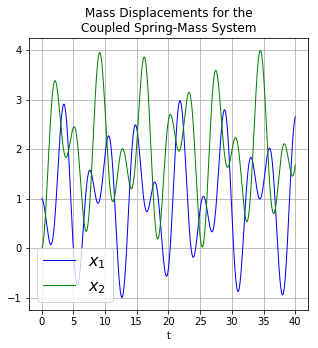

In [75]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, legend, title, savefig
from matplotlib.font_manager import FontProperties

t, x1, xy, x2, y2 = loadtxt('two_springs.dat', unpack=True)

figure(1, figsize=(5, 5))

xlabel('t')
grid(True)
#hold(True)
lw = 1

plot(t, x1, 'b', linewidth=lw)
plot(t, x2, 'g', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Mass Displacements for the\nCoupled Spring-Mass System')
savefig('two_springs.png', dpi=100)

In [6]:
import pandas as pd
df9 = pd.read_csv('two_springs.dat', engine='python')
df9 = df9.drop(df9.index[0]).reset_index(drop=True)
df9 = pd.DataFrame(df9)

In [7]:
df9

,0.0 1.0 0.0 0.0 0.0
0,0.057183702644746245 0.9967335882216427 -0.114...
1,0.08577555396711938 0.9926605833693293 -0.1707...
2,0.11436740528949249 0.9869770423196249 -0.2267...
3,0.14295925661186562 0.9797015657581802 -0.2820...
4,0.17155110793423875 0.9708579944309859 -0.3364...
5,0.20014295925661185 0.9604753298471186 -0.3896...
6,0.22873481057898498 0.9485876643316223 -0.4416...
7,0.2573266619013581 0.9352340923030098 -0.49217...
8,0.28591851322373124 0.920458601162305 -0.54108...
9,0.31451036454610437 0.9043099589641902 -0.5882...
